In [63]:
!pip install pmdarima

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# Bước 1: Đọc dữ liệu
file_path = '/content/USDT-USD.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Hiển thị thông tin cơ bản
print(data.head())
print(data.info())

# Chọn cột 'Close' để phân tích
data = data['Close']




                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2019-03-01  1.009786  1.016391  1.005785  1.006868   1.006868  6628411253
2019-03-02  1.006662  1.014362  1.005656  1.011416   1.011416  6623334103
2019-03-03  1.008331  1.014543  1.006855  1.010220   1.010220  6148316202
2019-03-04  1.008603  1.017043  1.007319  1.011617   1.011617  8129567032
2019-03-05  1.010793  1.013756  1.004794  1.011154   1.011154  9791470887
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1920 non-null   float64
 1   High       1920 non-null   float64
 2   Low        1920 non-null   float64
 3   Close      1920 non-null   float64
 4   Adj Close  1920 non-null   float64
 5   Volume     1920 non-null   int64  
dtypes: float64(5), int64(1)
memory us

In [65]:
# Bước 2: Kiểm tra tính dừng
# Kiểm tra ADF
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

print("\nADF Test for Original Series:")
adf_test(data)








ADF Test for Original Series:
ADF Statistic: -6.056748
p-value: 0.000000


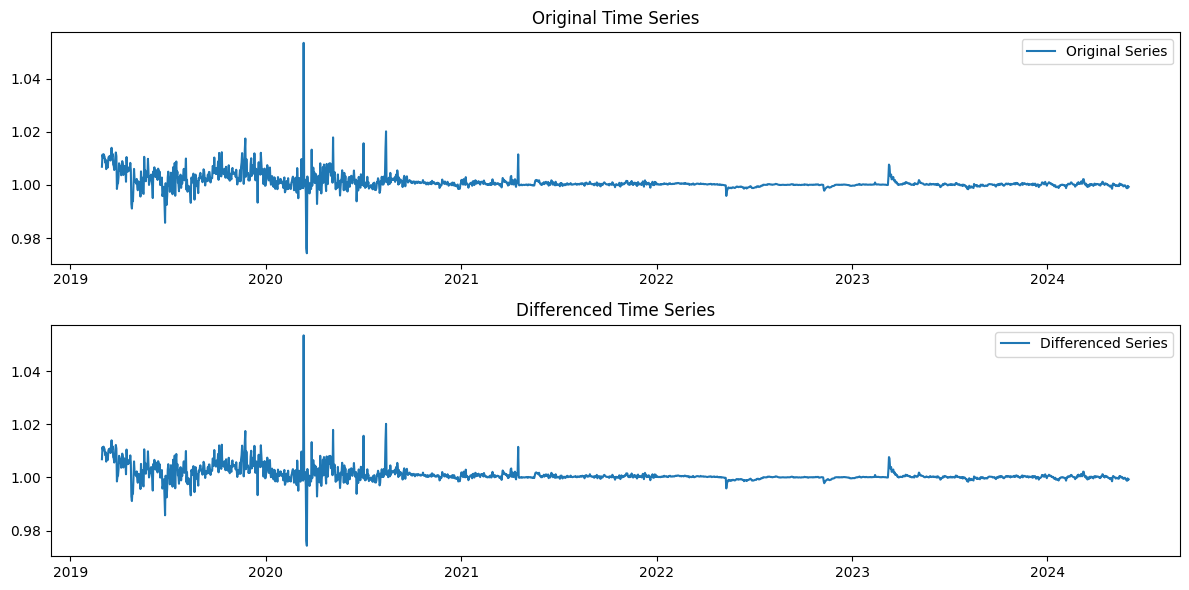

In [66]:
# Bước 3: Làm cho chuỗi có tính dừng (nếu cần)
# Kiểm tra và áp dụng differencing
diff_data = data
if adfuller(data)[1] > 0.05:
    diff_data = data.diff().dropna()
    print("\nADF Test after Differencing:")
    adf_test(diff_data)

# Vẽ biểu đồ chuỗi ban đầu và sau khi differencing
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(data, label='Original Series')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.subplot(212)
if 'diff_data' in locals():
    plt.plot(diff_data, label='Differenced Series')
    plt.legend(loc='best')
    plt.title('Differenced Time Series')
plt.tight_layout()
plt.show()

**Chia tập dữ liệu 7:3**

In [67]:
# Bước 4: Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 70:30
train_size = int(len(diff_data) * 0.7)
train, test = diff_data[:train_size], diff_data[train_size:]

In [68]:
# Bước 5: Tìm các thông số ARIMA
# Sử dụng auto_arima để tìm p, d, q tốt nhất
auto_model = auto_arima(train, seasonal=False, trace=True)
print(auto_model.summary())

# Lấy thông số từ auto_arima
p, d, q = auto_model.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11802.213, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11307.711, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11566.094, Time=1.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11788.758, Time=2.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11309.708, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11813.961, Time=1.91 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11838.872, Time=1.74 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-11860.232, Time=2.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11855.272, Time=7.29 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-11854.089, Time=3.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-11850.104, Time=2.63 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-11862.040, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-11840.769, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-11873.107, Time=1.69 sec
 ARIM

In [69]:
# Bước 6: Huấn luyện mô hình ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [70]:
# Bước 7: Dự đoán trên tập kiểm tra
forecast_test = model_fit.forecast(steps=len(test))
test_forecast = pd.Series(forecast_test, index=test.index)

In [71]:
# Bước 8: Đánh giá mô hình
# MSE
mse = mean_squared_error(test, test_forecast)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(test, test_forecast)

# MAPE
mape = np.mean(np.abs((test - test_forecast) / test)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Squared Error (MSE): 5.638453587332129e-07
Root Mean Squared Error (RMSE): 0.0007508963701691551
Mean Absolute Error (MAE): 0.00040796728343080294
Mean Absolute Percentage Error (MAPE): 0.04%


In [72]:
# Bước 9: Dự đoán cho 30, 60, và 90 ngày tương lai
future_steps = [30, 60, 90]
future_forecasts = {}
for steps in future_steps:
    future_forecasts[steps] = model_fit.forecast(steps=steps)
    print(f"\nForecast for next {steps} days:")
    print(future_forecasts[steps])

# Tạo chỉ số thời gian cho dự đoán tương lai
last_date = diff_data.index[-1]
future_dates = {
    30: pd.date_range(last_date, periods=31)[1:],  # Bỏ ngày đầu tiên vì nó là ngày cuối cùng của dữ liệu
    60: pd.date_range(last_date, periods=61)[1:],
    90: pd.date_range(last_date, periods=91)[1:]
}


Forecast for next 30 days:
2022-11-04    1.000057
2022-11-05    1.000067
2022-11-06    1.000070
2022-11-07    1.000070
2022-11-08    1.000070
2022-11-09    1.000070
2022-11-10    1.000070
2022-11-11    1.000070
2022-11-12    1.000070
2022-11-13    1.000070
2022-11-14    1.000070
2022-11-15    1.000070
2022-11-16    1.000070
2022-11-17    1.000070
2022-11-18    1.000070
2022-11-19    1.000070
2022-11-20    1.000070
2022-11-21    1.000070
2022-11-22    1.000070
2022-11-23    1.000070
2022-11-24    1.000070
2022-11-25    1.000070
2022-11-26    1.000070
2022-11-27    1.000070
2022-11-28    1.000070
2022-11-29    1.000070
2022-11-30    1.000070
2022-12-01    1.000070
2022-12-02    1.000070
2022-12-03    1.000070
Freq: D, Name: predicted_mean, dtype: float64

Forecast for next 60 days:
2022-11-04    1.000057
2022-11-05    1.000067
2022-11-06    1.000070
2022-11-07    1.000070
2022-11-08    1.000070
2022-11-09    1.000070
2022-11-10    1.000070
2022-11-11    1.000070
2022-11-12    1.000070
2

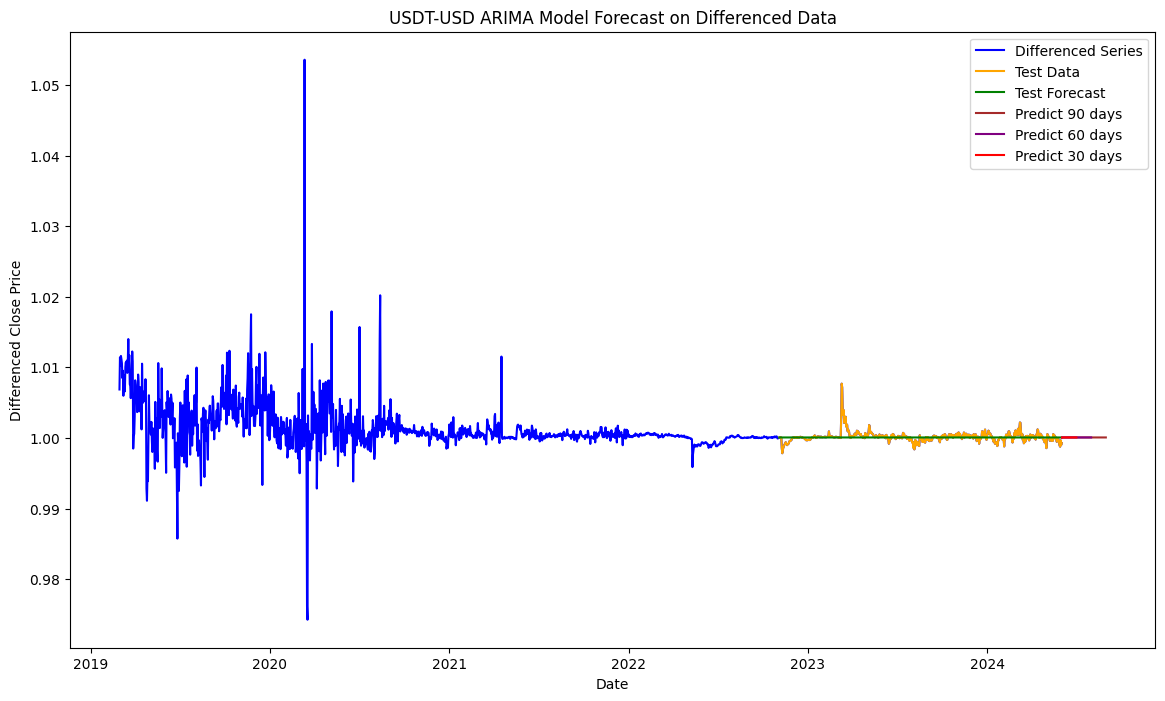

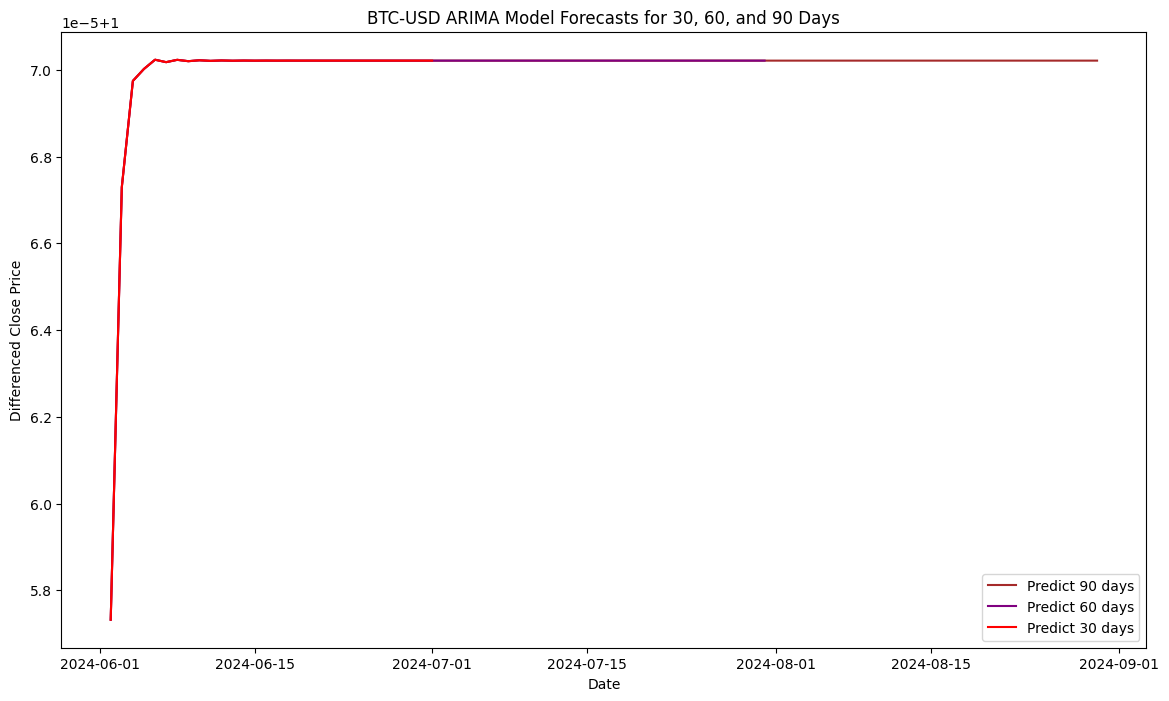

In [73]:

# Bước 10: Vẽ biểu đồ kết hợp

plt.figure(figsize=(14, 8))

# Biểu đồ dữ liệu đã differenced (dữ liệu có tính dừng)
plt.plot(diff_data, label='Differenced Series', color='blue')

# Biểu đồ dữ liệu kiểm tra
plt.plot(test.index, test, label='Test Data', color='orange')

# Biểu đồ dự đoán trên tập kiểm tra
plt.plot(test.index, test_forecast, label='Test Forecast', color='green')

# Dự đoán cho tương lai
# Thứ tự vẽ lần lượt từ 90 ngày, 60 ngày đến 30 ngày để đảm bảo hiển thị rõ ràng
plt.plot(future_dates[90], future_forecasts[90], label='Predict 90 days', color='brown')
plt.plot(future_dates[60], future_forecasts[60], label='Predict 60 days', color='purple')
plt.plot(future_dates[30], future_forecasts[30], label='Predict 30 days', color='red')

plt.legend(loc='best')
plt.title('USDT-USD ARIMA Model Forecast on Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

# Chỉ hiển thị dự đoán cho 30, 60, và 90 ngày
plt.figure(figsize=(14, 8))

# Vẽ từ 90 ngày trước, sau đó là 60 ngày và cuối cùng là 30 ngày
plt.plot(future_dates[90], future_forecasts[90], label='Predict 90 days', color='brown')
plt.plot(future_dates[60], future_forecasts[60], label='Predict 60 days', color='purple')
plt.plot(future_dates[30], future_forecasts[30], label='Predict 30 days', color='red')

plt.legend(loc='best')
plt.title('BTC-USD ARIMA Model Forecasts for 30, 60, and 90 Days')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

Chia dữ liệu 8:2

In [74]:
# Bước 4: Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 80:20
train_size = int(len(diff_data) * 0.8)
train, test = diff_data[:train_size], diff_data[train_size:]

In [75]:
# Bước 5: Tìm các thông số ARIMA
# Sử dụng auto_arima để tìm p, d, q tốt nhất
auto_model = auto_arima(train, seasonal=False, trace=True)
print(auto_model.summary())

# Lấy thông số từ auto_arima
p, d, q = auto_model.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13682.842, Time=4.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13124.841, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13417.148, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13666.678, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13126.838, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13699.863, Time=2.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13723.770, Time=2.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-13747.431, Time=1.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13760.096, Time=2.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13732.325, Time=1.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-13754.069, Time=5.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-13740.524, Time=3.30 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-13734.256, Time=1.98 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-13743.952, Time=0.94 sec

Best

In [76]:
# Bước 6: Huấn luyện mô hình ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [77]:
# Bước 7: Dự đoán và đánh giá mô hình
# Dự đoán trên tập kiểm tra
forecast = model_fit.forecast(steps=len(test))
test_forecast = pd.Series(forecast, index=test.index)


In [78]:
# Bước 8: Đánh giá mô hình
# MSE
mse = mean_squared_error(test, test_forecast)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(test, test_forecast)

# MAPE
mape = np.mean(np.abs((test - test_forecast) / test)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Squared Error (MSE): 6.17288942735704e-07
Root Mean Squared Error (RMSE): 0.0007856773782766715
Mean Absolute Error (MAE): 0.0006628738325343596
Mean Absolute Percentage Error (MAPE): 0.07%


In [79]:
# Bước 9: Dự đoán cho 30, 60, và 90 ngày tương lai
future_steps = [30, 60, 90]
future_forecasts = {}
for steps in future_steps:
    future_forecasts[steps] = model_fit.forecast(steps=steps)

# Tạo chỉ số thời gian cho dự đoán tương lai
last_date = diff_data.index[-1]
future_dates = {
    30: pd.date_range(last_date, periods=31)[1:],  # Bỏ ngày đầu tiên vì nó là ngày cuối cùng của dữ liệu
    60: pd.date_range(last_date, periods=61)[1:],
    90: pd.date_range(last_date, periods=91)[1:]
}

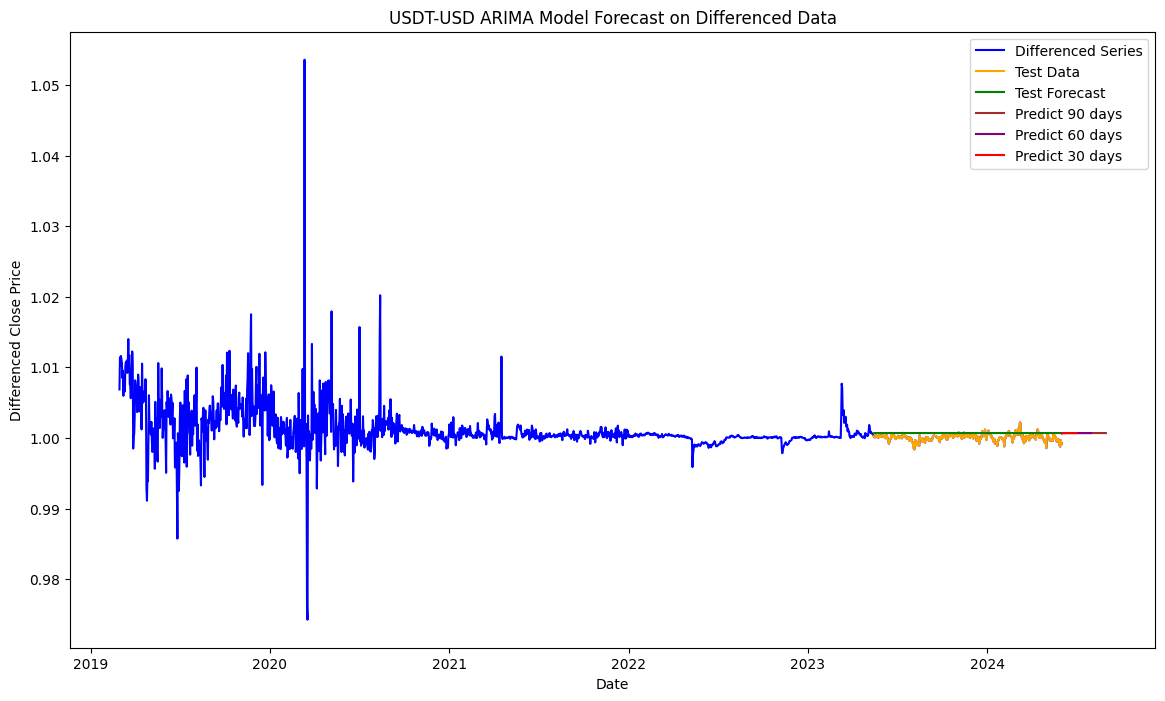

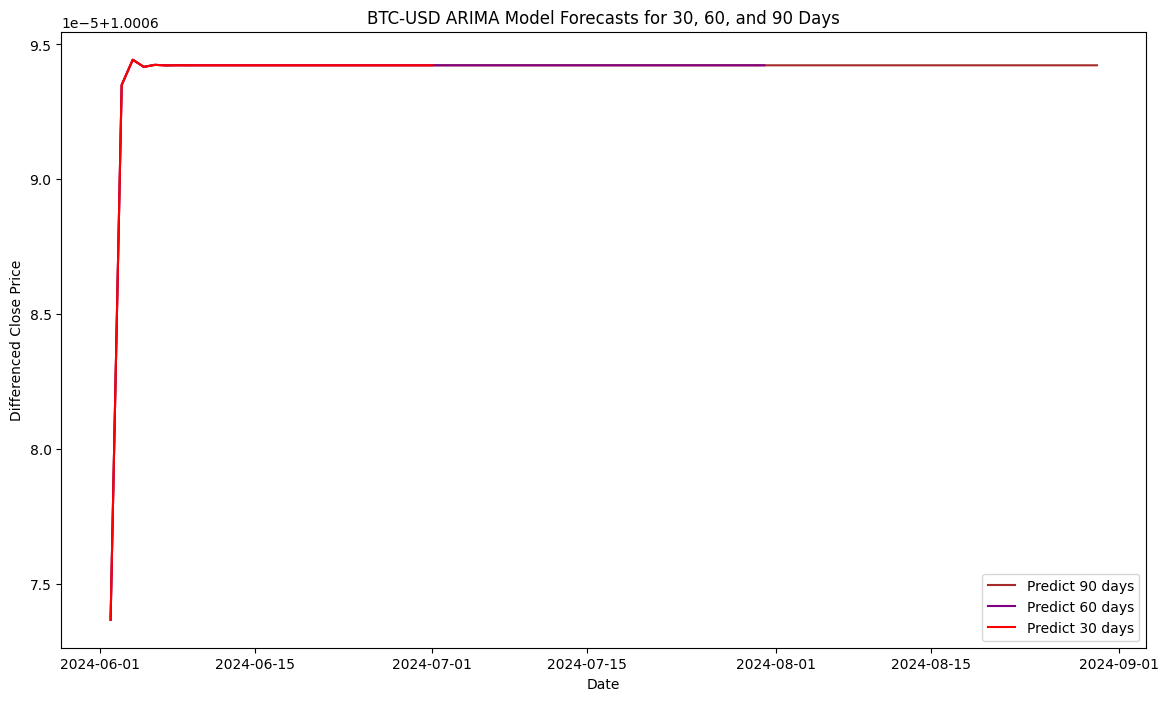

In [80]:

# Bước 10: Vẽ biểu đồ kết hợp

plt.figure(figsize=(14, 8))

# Biểu đồ dữ liệu đã differenced (dữ liệu có tính dừng)
plt.plot(diff_data, label='Differenced Series', color='blue')

# Biểu đồ dữ liệu kiểm tra
plt.plot(test.index, test, label='Test Data', color='orange')

# Biểu đồ dự đoán trên tập kiểm tra
plt.plot(test.index, test_forecast, label='Test Forecast', color='green')

# Dự đoán cho tương lai
# Thứ tự vẽ lần lượt từ 90 ngày, 60 ngày đến 30 ngày để đảm bảo hiển thị rõ ràng
plt.plot(future_dates[90], future_forecasts[90], label='Predict 90 days', color='brown')
plt.plot(future_dates[60], future_forecasts[60], label='Predict 60 days', color='purple')
plt.plot(future_dates[30], future_forecasts[30], label='Predict 30 days', color='red')

plt.legend(loc='best')
plt.title('USDT-USD ARIMA Model Forecast on Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

# Chỉ hiển thị dự đoán cho 30, 60, và 90 ngày
plt.figure(figsize=(14, 8))

# Vẽ từ 90 ngày trước, sau đó là 60 ngày và cuối cùng là 30 ngày
plt.plot(future_dates[90], future_forecasts[90], label='Predict 90 days', color='brown')
plt.plot(future_dates[60], future_forecasts[60], label='Predict 60 days', color='purple')
plt.plot(future_dates[30], future_forecasts[30], label='Predict 30 days', color='red')

plt.legend(loc='best')
plt.title('BTC-USD ARIMA Model Forecasts for 30, 60, and 90 Days')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

**Chia dữ liệu tỷ lệ 6 : 4**

In [81]:
# Bước 4: Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 60:40
train_size = int(len(diff_data) * 0.6)
train, test = diff_data[:train_size], diff_data[train_size:]

In [82]:
# Bước 5: Tìm các thông số ARIMA
# Sử dụng auto_arima để tìm p, d, q tốt nhất
auto_model = auto_arima(train, seasonal=False, trace=True)
print(auto_model.summary())

# Lấy thông số từ auto_arima
p, d, q = auto_model.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9877.417, Time=2.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9514.426, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9735.816, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9984.247, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9516.422, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9969.853, Time=1.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9969.781, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9948.520, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9929.023, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 8.639 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1152
Model:               SARIMAX(0, 1, 1)   Log Likelihood                4995.123
Date:                Tue, 18 Jun 2024   

In [83]:
# Bước 6: Huấn luyện mô hình ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [84]:
# Bước 7: Dự đoán trên tập kiểm tra
forecast_test = model_fit.forecast(steps=len(test))
test_forecast = pd.Series(forecast_test, index=test.index)

In [85]:
# Bước 8: Đánh giá mô hình
# MSE
mse = mean_squared_error(test, test_forecast)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(test, test_forecast)

# MAPE
mape = np.mean(np.abs((test - test_forecast) / test)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Squared Error (MSE): 5.696426940239066e-07
Root Mean Squared Error (RMSE): 0.0007547467747688006
Mean Absolute Error (MAE): 0.0004418251302536911
Mean Absolute Percentage Error (MAPE): 0.04%


In [86]:
# Bước 9: Dự đoán cho 30, 60, và 90 ngày tương lai
future_steps = [30, 60, 90]
future_forecasts = {}
for steps in future_steps:
    future_forecasts[steps] = model_fit.forecast(steps=steps)

# Tạo chỉ số thời gian cho dự đoán tương lai
last_date = diff_data.index[-1]
future_dates = {
    30: pd.date_range(last_date, periods=31)[1:],  # Bỏ ngày đầu tiên vì nó là ngày cuối cùng của dữ liệu
    60: pd.date_range(last_date, periods=61)[1:],
    90: pd.date_range(last_date, periods=91)[1:]
}

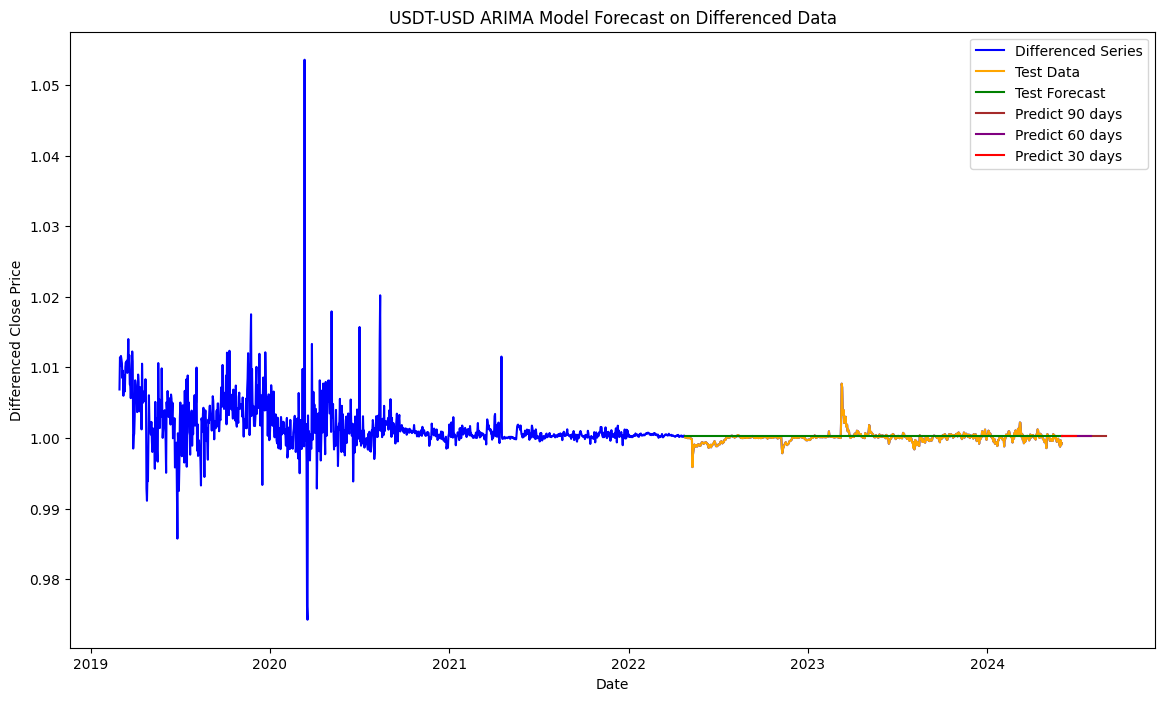

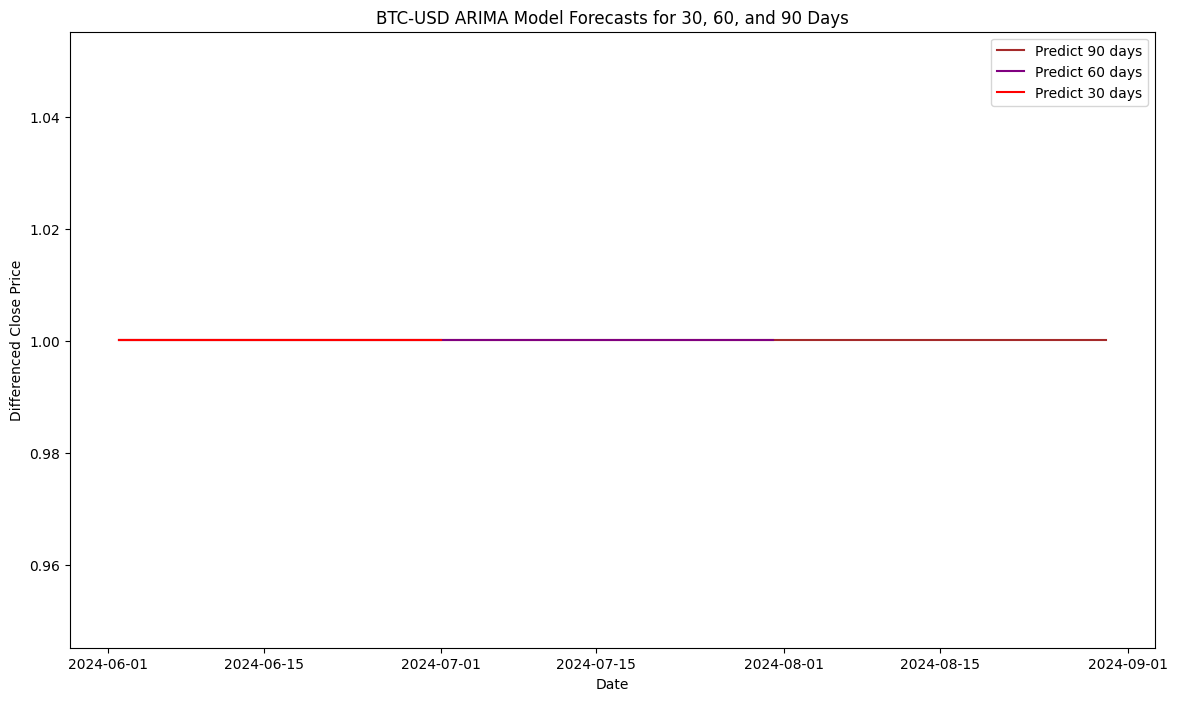

In [87]:

# Bước 10: Vẽ biểu đồ kết hợp

plt.figure(figsize=(14, 8))

# Biểu đồ dữ liệu đã differenced (dữ liệu có tính dừng)
plt.plot(diff_data, label='Differenced Series', color='blue')

# Biểu đồ dữ liệu kiểm tra
plt.plot(test.index, test, label='Test Data', color='orange')

# Biểu đồ dự đoán trên tập kiểm tra
plt.plot(test.index, test_forecast, label='Test Forecast', color='green')

# Dự đoán cho tương lai
# Thứ tự vẽ lần lượt từ 90 ngày, 60 ngày đến 30 ngày để đảm bảo hiển thị rõ ràng
plt.plot(future_dates[90], future_forecasts[90], label='Predict 90 days', color='brown')
plt.plot(future_dates[60], future_forecasts[60], label='Predict 60 days', color='purple')
plt.plot(future_dates[30], future_forecasts[30], label='Predict 30 days', color='red')

plt.legend(loc='best')
plt.title('USDT-USD ARIMA Model Forecast on Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

# Chỉ hiển thị dự đoán cho 30, 60, và 90 ngày
plt.figure(figsize=(14, 8))

# Vẽ từ 90 ngày trước, sau đó là 60 ngày và cuối cùng là 30 ngày
plt.plot(future_dates[90], future_forecasts[90], label='Predict 90 days', color='brown')
plt.plot(future_dates[60], future_forecasts[60], label='Predict 60 days', color='purple')
plt.plot(future_dates[30], future_forecasts[30], label='Predict 30 days', color='red')

plt.legend(loc='best')
plt.title('BTC-USD ARIMA Model Forecasts for 30, 60, and 90 Days')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()